In [1]:
import numpy as np
import random as rn
import pandas as pd
import seaborn as sns
import math
import csv
from pathlib import Path  
filepath = Path(r"D:\KNN\out_final.csv")  
filepath.parent.mkdir(parents=True, exist_ok=True) 
accuracy = {'Function': [],
        'm': [],
        'k':[],
        'Accuracy':[]
        }
dfGlobal = pd.DataFrame(accuracy)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
anemia=pd.read_csv(r"D:\KNN\anemia.csv")

In [3]:
anemia.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


<AxesSubplot:xlabel='Hemoglobin', ylabel='Gender'>

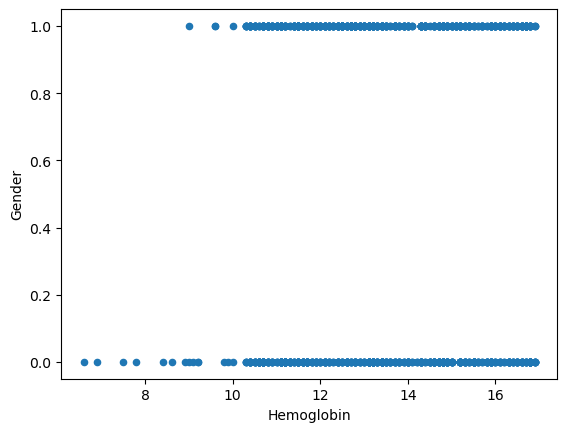

In [4]:
anemia.plot(kind="scatter",x="Hemoglobin",y="Gender")

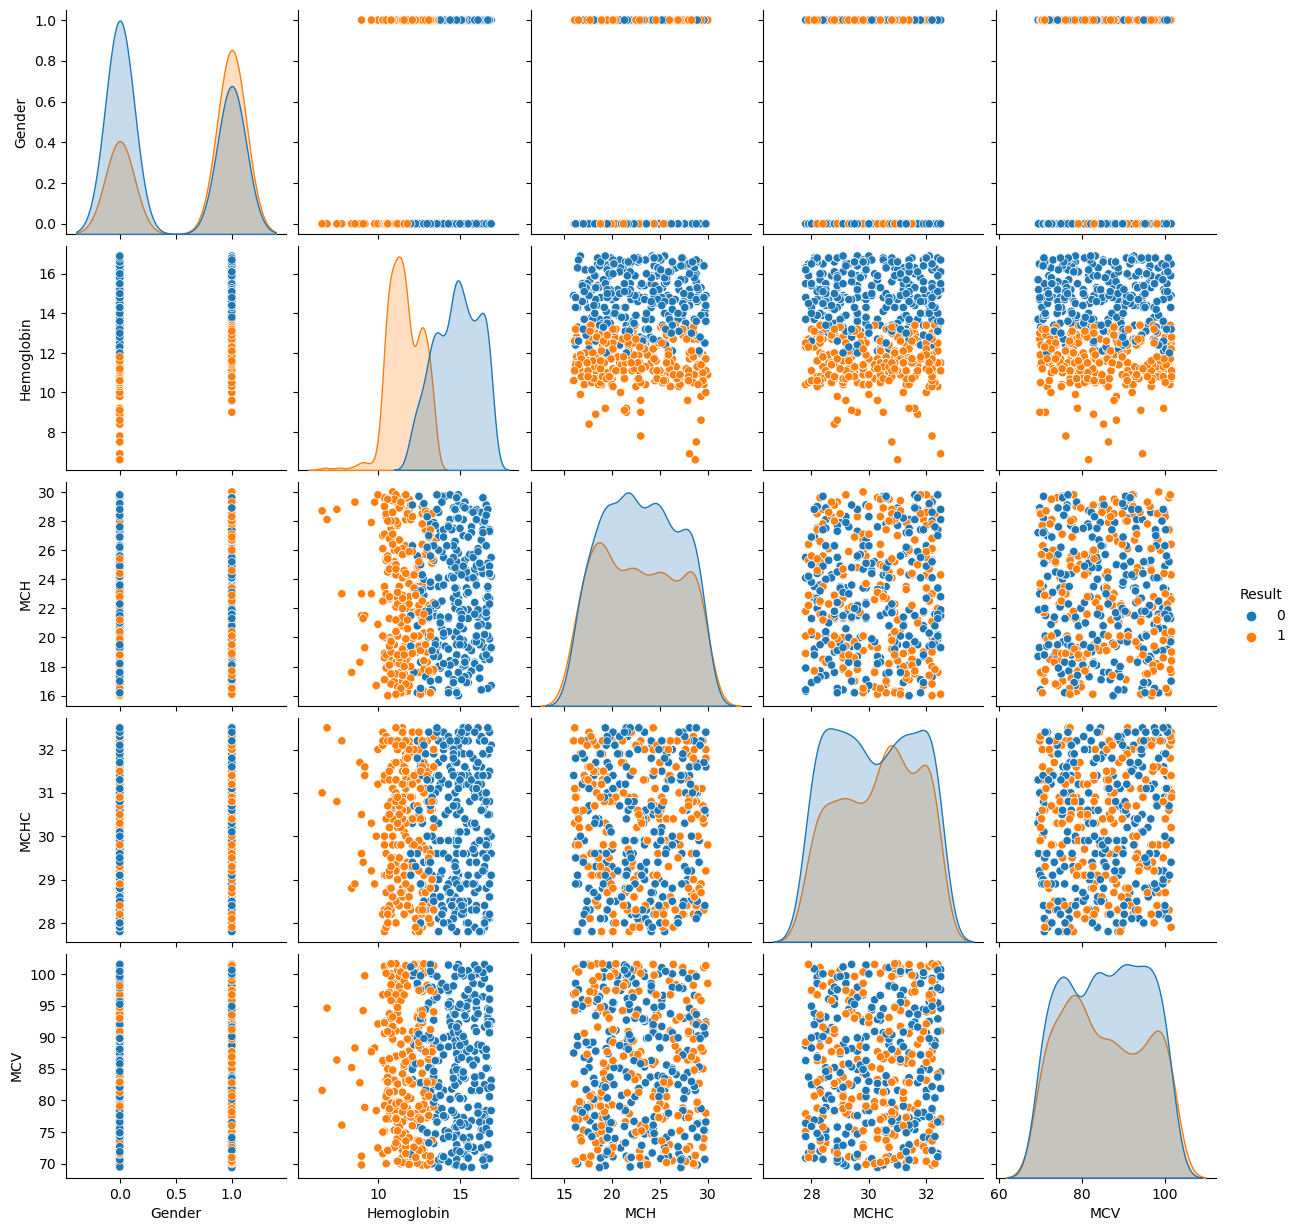

In [5]:
sns.pairplot(anemia,hue="Result")

In [6]:
class DataProcessing:
    @staticmethod
    def shuffle(x):
        for i in range(len(x)-1,0,-1):
            j=rn.randint(0,i-1)
            x.iloc[i],x.iloc[j]=x.iloc[j],x.iloc[i]
    def normalization(x):
        values = x.select_dtypes(exclude="object")
        columnNames=values.columns.tolist()
        for column in columnNames:
            data=x.loc[:,column]
            min1=min(data)
            max1=max(data)
            for row in range(len(x)):
                xprim=(x.at[row,column]-min1)/(max1-min1)
                x.at[row,column]=xprim
    def split(x,t):
        return x[:int(len(x)*t)],x[int(len(x)*t):]

In [7]:
DataProcessing.shuffle(anemia)
DataProcessing.normalization(anemia)
trainingDataVariable=0.7
trainingSet, validatingSet = DataProcessing.split(anemia,trainingDataVariable)
trainingSet.to_csv(r"D:\KNN\out_trainingSet.csv")  
validatingSet.to_csv(r"D:\KNN\out_validatingSet.csv")

In [8]:
anemia.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,0.757282,0.657143,0.936170,0.791925,0
1,0,0.796117,0.257143,0.255319,0.559006,0
2,1,0.446602,0.842857,0.936170,0.819876,1
3,0,0.941748,0.028571,0.000000,0.599379,0
4,1,0.553398,0.492857,0.021277,0.049689,1


In [9]:
class KNN:
    @staticmethod  
    def clusteringMinkowski(training,sample,k,m):
        distances=[]
        for p in range(len(training)): 
            tmp=0 
            for j in range(len(sample)-1)
                tmp += pow(abs(training.iloc[p][j]-sample[j]),m)
            distances.append(tmp**(1/m))
        training["distance"]=distances 
        training=training.sort_values('distance')
        dictonary={"1":0,"0":0}
        for i in range (k):
            if training.iloc[i]["Result"] == 1:
                dictonary['1']+=1
            else:
                dictonary['0']+=1
            
        return max(dictonary,key=dictonary.get)

In [10]:
accuracy = {'Function': [],
        'm': [],
        'k':[],
        'Accuracy':[]
        }
dfAccuracy = pd.DataFrame(accuracy)
counter=0
for j in range(2,16):
    for m in range(1,15):
        counter=0
        for i in range (len(validatingSet)):
            tmp=KNN.clusteringMinkowski(trainingSet,validatingSet.iloc[i],j,m)
            if int(tmp) == validatingSet.iloc[i]['Result']:
                counter+=1
        accuracy = counter/len(validatingSet)*100        
        print("Accuracy", accuracy,"%")
        dfAccuracy.loc[len(dfAccuracy.index)] = ['Mikowski', m, j, accuracy]
        dfGlobal.loc[len(dfGlobal.index)] = ['Mikowski', m, j, accuracy]
print(dfAccuracy)

Dokladnosc 93.20843091334895 %
Dokladnosc 92.97423887587823 %
Dokladnosc 94.61358313817331 %
Dokladnosc 94.61358313817331 %
Dokladnosc 94.61358313817331 %
Dokladnosc 94.61358313817331 %
Dokladnosc 94.61358313817331 %
Dokladnosc 94.14519906323186 %
Dokladnosc 94.14519906323186 %
Dokladnosc 94.14519906323186 %
Dokladnosc 94.61358313817331 %
Dokladnosc 94.61358313817331 %
Dokladnosc 94.84777517564403 %
Dokladnosc 94.84777517564403 %
Dokladnosc 94.37939110070258 %
Dokladnosc 93.6768149882904 %
Dokladnosc 92.7400468384075 %
Dokladnosc 93.44262295081968 %
Dokladnosc 93.91100702576112 %
Dokladnosc 93.20843091334895 %
Dokladnosc 92.97423887587823 %
Dokladnosc 92.50585480093677 %
Dokladnosc 92.50585480093677 %
Dokladnosc 92.50585480093677 %
Dokladnosc 92.97423887587823 %
Dokladnosc 92.97423887587823 %
Dokladnosc 92.97423887587823 %
Dokladnosc 92.97423887587823 %
Dokladnosc 93.6768149882904 %
Dokladnosc 94.37939110070258 %
Dokladnosc 93.6768149882904 %
Dokladnosc 93.20843091334895 %
Dokladnosc 9

In [11]:
dfAccuracy=dfAccuracy.sort_values("Accuracy", ascending = False).reset_index(drop=True)
print(dfAccuracy)
dfGlobal.to_csv(r"D:\KNN\out_before_best.csv")
dfGlobal.loc[len(dfGlobal.index)] = ['thebest', 0, 0, 0]

     Function   m   k   Accuracy
0    mikowski   1  13  95.316159
1    mikowski  14   2  94.847775
2    mikowski  13   2  94.847775
3    mikowski   1  11  94.847775
4    mikowski   3   2  94.613583
..        ...  ..  ..        ...
191  mikowski  11  14  88.992974
192  mikowski  10  14  88.992974
193  mikowski  14  15  88.992974
194  mikowski  11  15  88.758782
195  mikowski  12  15  88.758782

[196 rows x 4 columns]


In [14]:
def theBest(df,t):
    tDvF=t#variable to split the validation set
    numberOfTheSameAccuracy=0 
    tmpAccuracy=df.loc[0].at["Accuracy"] #highest accuracy
    trainingSet, validatingSet = DataProcessing.split(anemia,tDvF)
    print(tmpAccuracy)
    for i in range(len(df)):
        if tmpAccuracy==df.loc[i].at["Accuracy"]:
            numberOfTheSameAccuracy+=1
    print(numberOfTheSameAccuracy)
    if numberOfTheSameAccuracy >1 and len(validatingSet.index)>1: 
        tDvF=tDvF/2
        trainingSet, validatingSet = DataProcessing.split(anemia,tDvF) 
        tableOfAccuracy=np.zeros((numberOfTheSameAccuracy,3)) #temporary array for k and m
        for k in range (0,numberOfTheSameAccuracy):
            counter=0
            for i in range (len(validatingSet)):#checking the accuracy for each same distance
                tmp=KNN.clusteringMinkowski(trainingSet,validatingSet.iloc[i],df.loc[k].at["k"],df.loc[k].at["m"])
                if int(tmp) == validatingSet.iloc[i]['Result']:
                    counter+=1
            accuracy = counter/len(validatingSet)*100        
            print("Dokladnosc", accuracy,"%")
            tableOfAccuracy[k][0]=df.loc[k].at["k"]#placing k, m, accuracy in a temporary table
            tableOfAccuracy[k][1]=df.loc[k].at["m"]
            tableOfAccuracy[k][2]=accuracy
        df=df[0:0]
        for j in range(0,numberOfTheSameAccuracy):#adding new values to the database
            df.loc[len(df.index)] = ['mikowski', int(tableOfAccuracy[j][1]), int(tableOfAccuracy[j][0]), tableOfAccuracy[j][2]]
            dfGlobal.loc[len(dfGlobal.index)] = ['mikowski', int(tableOfAccuracy[j][1]), int(tableOfAccuracy[j][0]), tableOfAccuracy[j][2]]
            
        df=df.sort_values("Accuracy", ascending = False).reset_index(drop=True)    
        print(df)    
        dfGlobal.loc[len(dfGlobal.index)] = ['next', 0, 0, 0]
        return theBest(df,tDvF,vDvF)
    else: 
        dfGlobal.loc[len(dfGlobal.index)] = ['thebestbest', df.loc[0].at["m"], df.loc[0].at["k"], df.loc[0].at["Accuracy"]]
        print(tmpAccuracy) 
        return df.loc[0]

In [15]:
theBest(dfAccuracy,validatingDataVariable, trainingDataVariable)
dfGlobal.to_csv(filepath)  

95.31615925058547
1
95.31615925058547
